In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re
import numpy as np
from collections import Counter

In [2]:
#stop = set(stopwords.words('english'))
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [3]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    processed = re.sub(r"\d+", "", normalized)
    y = processed.split()
    return y

In [4]:
print("classes on which K-NN classification is performed : \n1. Artificial Intelligence \n2. Jaringan \n3. RPL \n4. Sistem Informasi  ")
path = "data.txt"

train_clean_sentences = []
fp = open(path, 'r')
for line in fp:
    line = line.strip()
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
   # print(cleaned)
    train_clean_sentences.append(cleaned)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(train_clean_sentences)

# Creating true labels for 50 training sentences
y_train = np.zeros(50)
y_train[16:24] = 1
y_train[24:37] = 2
y_train[37:50] = 3

classes on which K-NN classification is performed : 
1. Artificial Intelligence 
2. Jaringan 
3. RPL 
4. Sistem Informasi  


In [5]:
# Clustering the document with KNN classifier
modelknn = KNeighborsClassifier(n_neighbors=9)
modelknn.fit(X, y_train)

# Predicting it on test data : Testing Phase
test_sentences = ["Emas dikenal sebagai satu logam langka dan punya suatu karakteristik unik emas adalah metal dengan satu taraf kemurnian lebih tinggi dapat lebih lentur. Oleh sebab itu, emas harus dicampur oleh logam lain kecuali pada lanjutan proses ini dari campuran emas memerlukan lebih cara praktis dalam praktek. Diawali dari kasus ini, peneliti yang disain sistem untuk menolong emas pelacak warna dari satu alat smartphone objectusing Android. Di detektor taraf emas ini, hal yang akan dianalisa adalah pemisahan warna latar belakang dengan hasil akumulasi RGB rata-ratakan. Kemudian mengumpulkan ke dalam rata-rata diperoleh dari test konten dari objek asli. Image masalah diteliti oleh test forgold mewarnai objek pada berbagai jarak dan kondisi. Berlandaskan test terlaksana, aplikasi dibangun untuk mengenali image dari satu warna emas adalah sangat cukup baik. Pada kasus lain, gambar warna emas tidak dapat dikenali penembakan lewat-waktu sumur memosisikan faktor objek image yang bukan didefinisikan dengan maksimal. Hasil test diselesaikan pada 30 sampel dari 18 - mutu oleh 3.3%, 19 - karat dengan 10%, 20 - karat dengan 13.3%, 21 – karat dengan 20%, 22 - karat dengan 26.6% dan 26.6% karat dengan 23 - mutu. Hasil test diperoleh di konten emas kuning sistem pelacakan adalah tidak begitu baik kalau hanya parameter warna penggunaan",
                  "Data tweet telah banyak dimanfaatkan dalam penelitian di bidang text mining. Salah satu diantaranya adalah dalam klasifikasi teks. Namun, sebagian besar data tweet merupakan data yang masih kotor dan mengandung banyak noise di dalamnya. Oleh karena itu, pemrosesan awal terhadap tweet sangat penting untuk dilakukan. Salah satu metode pemrosesan awal yang dilakukan untuk mereduksi noise dalam tweet adalah stopword removal. Lebih lanjut penelitian ini akan melakukan perbandingan hasil akurasi antara pemrosesan awal yang melibatkan proses penghapusan stopword dengan permosesan awal yang tanpa melibatkan stopword removal. Hal ini dilakukan untuk mengetahui signifikansi tahapan stopword removal dalam klasifikasi teks berbahasa Indonesia. Dalam penelitian ini, dilakukan dua model pemrosesan awal dimana salah satu proses melibatkan stopword removal dan proses yang lainnya tanpa melakukan stopword removal. Hasil eksperimen menunjukkan bahwa melakukan penghapusan stopword dalam pre-processing mampu meningkatkan performa klasifikasi yang dibuktikan dengan adanya peningkatan akurasi.",
                  "Pengujian perangkat lunak merupakan elemen kritis dalam menentukan kualitas suatu perangkat lunak. Pengujian ini meliputi desain, spesifikasi, dan koding. Penelitian ini bertujuan menguji kualitas perangkat lunak sistem informasi akademik di Universitas Islam Negeri Sunan Kalijaga. Pengujian ini menggunakan kerangka kerja McCall pada aspek product operation. Lima metrik yang diuji adalah correctness, reliability, efficiency, integrity, dan usability. Hasil pengujian menunjukan bahwa sistem informasi akademik ini memiliki kualitas yang baik dengan nilai di atas 70."]


In [6]:
test_clean_sentence = []
for test in test_sentences:
    cleaned_test = clean(test)
    cleaned = ' '.join(cleaned_test)
    cleaned = re.sub(r"\d+", "", cleaned)
    test_clean_sentence.append(cleaned)

Test = vectorizer.transform(test_clean_sentence)

true_test_labels = ['AI', 'JAR', 'SI', 'RPL']
predicted_labels_knn = modelknn.predict(Test)
print(predicted_labels_knn)

print("\nBelow 3 sentences will be predicted against the learned nieghbourhood:\n1. ",test_sentences[0], "\n2. ", test_sentences[1], "\n3. ", test_sentences[2])
print("\n-------------------------------PREDICTIONS BY KNN------------------------------------------")
print("\n", test_sentences[0], ":", true_test_labels[np.int(predicted_labels_knn[0])],"\n", test_sentences[1], ":", true_test_labels[np.int(predicted_labels_knn[1])],"\n", test_sentences[2], ":", true_test_labels[np.int(predicted_labels_knn[2])])


[3. 0. 2.]

Below 3 sentences will be predicted against the learned nieghbourhood:
1.  Emas dikenal sebagai satu logam langka dan punya suatu karakteristik unik emas adalah metal dengan satu taraf kemurnian lebih tinggi dapat lebih lentur. Oleh sebab itu, emas harus dicampur oleh logam lain kecuali pada lanjutan proses ini dari campuran emas memerlukan lebih cara praktis dalam praktek. Diawali dari kasus ini, peneliti yang disain sistem untuk menolong emas pelacak warna dari satu alat smartphone objectusing Android. Di detektor taraf emas ini, hal yang akan dianalisa adalah pemisahan warna latar belakang dengan hasil akumulasi RGB rata-ratakan. Kemudian mengumpulkan ke dalam rata-rata diperoleh dari test konten dari objek asli. Image masalah diteliti oleh test forgold mewarnai objek pada berbagai jarak dan kondisi. Berlandaskan test terlaksana, aplikasi dibangun untuk mengenali image dari satu warna emas adalah sangat cukup baik. Pada kasus lain, gambar warna emas tidak dapat dikenali 

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
def PieChart(score, labels):
    figl = plt.figure(); figl.add_subplot()
    plt.pie(score, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.axis('equal');plt.show()
    return None

In [9]:
def wordClouds(teks):
    wc = WordCloud(background_color="white")#, max_font_size=40
    wordcloud = wc.generate(teks)
    plt.figure(num=1, facecolor='w', edgecolor='k')
    plt.imshow(wordcloud, cmap=plt.cm.jet, interpolation='nearest', aspect='auto'); plt.xticks(()); plt.yticks(())
    plt.show()

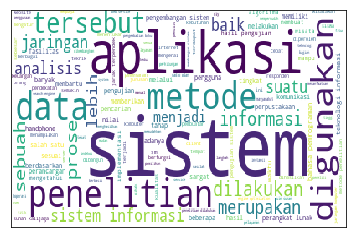

In [10]:
path = "data.txt"

fp = open(path, 'r')
data = ''
for line in fp:
    line = line.strip()
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    data = data + cleaned
wordClouds(data)